### TW3: Exploratory Data Analysis on COVID-19 Datasets


### Learning the data using visualization and simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name

- Pedro Voto
- Anh Tran


###  Simple Linear Regression example

Follow the code and observe the results

In [98]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [99]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

### Data Preparation

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [100]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [101]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [102]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

#### Load the data into a DataFrame

In [103]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

#### Select the data and visualize it

In [104]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

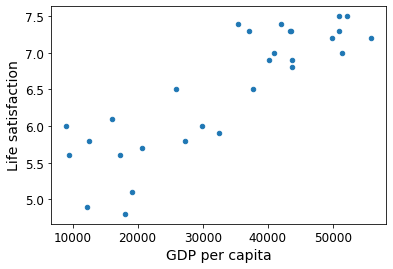

In [105]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [106]:
X.shape

(29, 1)

In [107]:
y.shape

(29, 1)

### Build a simple regression model


#### Create a simple linear regression 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [108]:
# import model
from sklearn.linear_model import LinearRegression

# Create a simple linear regression model
model = LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X,y)


LinearRegression()

In [109]:
print(model.coef_)
print(model.intercept_)

[[4.91154459e-05]]
[4.8530528]


#### Predict y for a new X value

In [110]:
# Make a prediction for Cyprus 
# new data value 22587 for Cyprus's GDP per capita
X_new = [[22587]]
y_predict = model.predict(X_new)
y_predict


array([[5.96242338]])

#### Plot a scatter graph together with the regression function

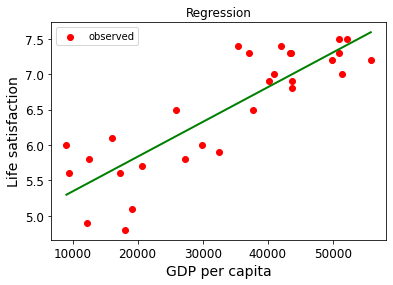

In [111]:
# Plot scatterplot 
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')

# plot the regression function
plt.plot(X,model.predict(X), c='green', label='fitted', linewidth=2)

plt.show()

## Model evaluation metrics for regression models

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

See more details: https://scikit-learn.org/stable/modules/model_evaluation.html

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## The R2 ("r-squared") Regression Score

- Measures how well a prediction model for regression fits the given data.

- The score is between 0 and 1:

     - A value of 0 corresponds to a constant model that predicts the mean value of all training target values.

     - A value of 1 corresponds to perfect prediction

- Also known as "coefficient of determination"

### Model Evaluation Example

#### 1. Preparing X and y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

See more details about Pandas Series and Numpy

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

#### 2. Splitting X and y into training and testing sets

We are using the same data that is stored X, y above. 

In [112]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        test_size=0.3, random_state=1)


#### 3. Linear regression in scikit-learn

In [113]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate a simple linear regression model 
linreg = LinearRegression()


# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

#### 4. Making predictions for testing data

Use X_test

In [114]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([[6.59031623],
       [6.90629497],
       [6.82350342],
       [6.90057464],
       [7.24870458],
       [6.88774681],
       [5.42891846],
       [6.12434396],
       [7.19687366]])

In [115]:
print(linreg.score(X_train, y_train)) #training accuracy

0.7119005755709598


In [116]:
print(linreg.score(X_test, y_test))

0.5844350680603303


#### 5. Computing the RMSE 

https://scikit-learn.org/stable/modules/model_evaluation.html

In [117]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.39596209321120795

#### 6. K Cross Validation and Learning Curve

In [118]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=3, random_state=None, shuffle=True)


##### Setting up a testbed using KFold 

In [119]:
# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 3-fold cross validation

rmse = []
r2 = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)

    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    r2.append(metrics.r2_score(y_test,y_pred))
    
print(rmse)
print(r2)

[0.42493607053444665, 0.596386725093759, 0.4537473687352488]
[0.7500406090237318, 0.2591603293729249, 0.745780173088916]


#### Learning Curve

Check the details for learning curve

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

[[0.06475715 0.21179511 0.14921954]
 [0.1489335  0.26666277 0.27094265]
 [0.40619768 0.31144753 0.41256528]
 [0.40651757 0.38547114 0.48480072]
 [0.36477439 0.43261206 0.46251288]]
[[2.2586879  0.66960775 0.61913827]
 [1.98536045 0.61266213 0.86457236]
 [0.84063403 0.52238852 0.67449714]
 [0.57476375 0.48477446 0.41300717]
 [0.57641632 0.49457006 0.47076509]]


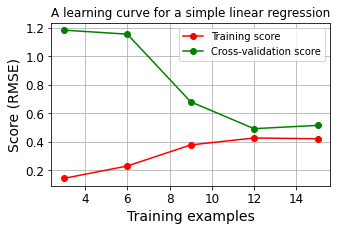

In [120]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2,0.8,5)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, train_sizes = train_sizes, 
                                scoring='neg_mean_squared_error',cv=3, shuffle = True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Teamwork


###  Part 1: Explore insight of the data using other visualization tools

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select attributes (columns) you are interested (either US only or all data).

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(d) Draw a scatter plot of the data

(e) Display simple linear regression function with a scatter plot
    --> You will see the data does not follow a simple linear function. 
   
(f) Create a logistic regression function instead of a simple linear regression. See the web resources below:

    from sklearn.linear_model import LogisticRegression
    
This time draw a scatter plot of the data together with the logistic regression function. 

In [121]:
import pandas as pd
import glob
path = r'C:\Users\pedro\Desktop\COVID-19-master\csse_covid_19_data\csse_covid_19_daily_reports_us' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [122]:
frame.set_index("Province_State")

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
Province_State,,,,,,,,,,,,,,,,,,,
Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,7459.375895,1885216.0,NaN,1.332068,84000001.0,USA,38448.804196,NaN,NaN,NaN
Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN,NaN,NaN
American Samoa,US,2021-01-02 05:30:44,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN,NaN,NaN
Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,7285.171274,2878868.0,NaN,1.700087,84000004.0,USA,39551.860582,NaN,NaN,NaN
Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,7602.945718,2051488.0,NaN,1.617402,84000005.0,USA,67979.497674,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,US,2021-01-01 05:30:27,37.7693,-78.1700,349584,5032,30707.0,313845.0,51.0,4095.638473,4255991.0,NaN,1.439425,84000051.0,USA,49862.123205,NaN,NaN,NaN
Washington,US,2021-01-01 05:30:27,47.4009,-121.4905,246752,3461,NaN,243291.0,53.0,3240.386963,3805390.0,NaN,1.402623,84000053.0,USA,49972.993711,NaN,NaN,NaN
West Virginia,US,2021-01-01 05:30:27,38.4912,-80.9545,85334,1338,59508.0,24488.0,54.0,4761.551368,1514520.0,NaN,1.567957,84000054.0,USA,84508.692646,NaN,NaN,NaN


In [123]:
frame

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
0,Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,7459.375895,1885216.0,NaN,1.332068,84000001.0,USA,38448.804196,NaN,NaN,NaN
1,Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN,NaN,NaN
2,American Samoa,US,2021-01-02 05:30:44,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN,NaN,NaN
3,Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,7285.171274,2878868.0,NaN,1.700087,84000004.0,USA,39551.860582,NaN,NaN,NaN
4,Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,7602.945718,2051488.0,NaN,1.617402,84000005.0,USA,67979.497674,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16253,Virginia,US,2021-01-01 05:30:27,37.7693,-78.1700,349584,5032,30707.0,313845.0,51.0,4095.638473,4255991.0,NaN,1.439425,84000051.0,USA,49862.123205,NaN,NaN,NaN
16254,Washington,US,2021-01-01 05:30:27,47.4009,-121.4905,246752,3461,NaN,243291.0,53.0,3240.386963,3805390.0,NaN,1.402623,84000053.0,USA,49972.993711,NaN,NaN,NaN
16255,West Virginia,US,2021-01-01 05:30:27,38.4912,-80.9545,85334,1338,59508.0,24488.0,54.0,4761.551368,1514520.0,NaN,1.567957,84000054.0,USA,84508.692646,NaN,NaN,NaN
16256,Wisconsin,US,2021-01-01 05:30:27,44.2685,-89.6165,520438,5242,447500.0,67696.0,55.0,8938.495481,5348488.0,NaN,1.007229,84000055.0,USA,91860.002192,NaN,NaN,NaN


In [124]:
frame.set_index(['Province_State', 'Last_Update'], inplace=True)
frame.sort_index(inplace=True)

In [125]:
frame

Country_Region      Lat     Long_  \
Province_State Last_Update                                             
Alabama        2020-04-12 23:18:15             US  32.3182  -86.9023   
               2020-04-13 23:07:54             US  32.3182  -86.9023   
               2020-04-14 23:33:31             US  32.3182  -86.9023   
               2020-04-15 22:56:51             US  32.3182  -86.9023   
               2020-04-16 23:30:51             US  32.3182  -86.9023   
...                                           ...      ...       ...   
Wyoming        2021-01-13 05:30:34             US  42.7560 -107.3025   
               2021-01-14 05:30:28             US  42.7560 -107.3025   
               2021-01-15 05:30:28             US  42.7560 -107.3025   
               2021-01-16 05:30:49             US  42.7560 -107.3025   
               2021-01-17 05:30:35             US  42.7560 -107.3025   

                                    Confirmed  Deaths  Recovered  Active  \
Province_State Last_Update                                                 
Alabama        2020-04-12 23:18:15       3667      93        NaN  3470.0   
               2020-04-13 23:07:54       3870      99        NaN  3635.0   
               2020-04-14 23:33:31       4041     114        NaN  3839.0   
               2020-04-15 22:56:51       4307     118        NaN  3957.0   
               2020-04-16 23:30:51       4465     133        NaN  4212.0   
...                                       ...     ...        ...     ...   
Wyoming        2021-01-13 05:30:34      48072     522    45223.0  2327.0   
               2021-01-14 05:30:28      48289     522    45904.0  1863.0   
               2021-01-15 05:30:28      48701     522    46127.0  2052.0   
               2021-01-16 05:30:49      48909     522    46502.0  1885.0   
               2021-01-17 05:30:35      49068     522    46734.0  1812.0   

                                    FIPS  Incident_Rate  Total_Test_Results  \
Province_State Last_Update                                                    
Alabama        2020-04-12 23:18:15   1.0      75.988020                 NaN   
               2020-04-13 23:07:54   1.0      79.634933                 NaN   
               2020-04-14 23:33:31   1.0      84.305541                 NaN   
               2020-04-15 22:56:51   1.0      86.907433                 NaN   
               2020-04-16 23:30:51   1.0      92.665716                 NaN   
...                                  ...            ...                 ...   
Wyoming        2021-01-13 05:30:34  56.0    8306.047941            536070.0   
               2021-01-14 05:30:28  56.0    8343.541958            537679.0   
               2021-01-15 05:30:28  56.0    8414.728756            542316.0   
               2021-01-16 05:30:49  56.0    8450.667722            549805.0   
               2021-01-17 05:30:35  56.0    8478.140297            549805.0   

                                    People_Hospitalized  Case_Fatality_Ratio  \
Province_State Last_Update                                                     
Alabama        2020-04-12 23:18:15                437.0                  NaN   
               2020-04-13 23:07:54                457.0                  NaN   
               2020-04-14 23:33:31                493.0                  NaN   
               2020-04-15 22:56:51                525.0                  NaN   
               2020-04-16 23:30:51                553.0                  NaN   
...                                                 ...                  ...   
Wyoming        2021-01-13 05:30:34                  NaN             1.085871   
               2021-01-14 05:30:28                  NaN             1.080992   
               2021-01-15 05:30:28                  NaN             1.071847   
               2021-01-16 05:30:49                  NaN             1.067288   
               2021-01-17 05:30:35                  NaN             1.063830   

                                        

In [161]:
print(frame.describe())


                Lat         Long_     Confirmed        Deaths     Recovered  \
count  15680.000000  15680.000000  1.625800e+04  16258.000000  1.307500e+04   
mean      36.840089    -85.206614  1.275021e+05   3212.556711  5.860917e+04   
std       10.789736     49.309784  2.320160e+05   5732.005920  1.273311e+05   
min      -14.271000   -170.132200  0.000000e+00      0.000000  0.000000e+00   
25%       34.594600   -101.165775  7.308000e+03    160.000000  2.998000e+03   
50%       39.061850    -87.944200  4.307300e+04    960.500000  1.217200e+04   
75%       42.361650    -76.970625  1.456225e+05   3652.000000  6.348850e+04   
max       61.370700    145.673900  2.959863e+06  40806.000000  1.666745e+06   

             Active          FIPS  Incident_Rate  Total_Test_Results  \
count  1.624100e+04  16239.000000   15680.000000        3.864000e+03   
mean   7.684026e+04   3276.768397    2077.182997        3.864179e+06   
std    1.875436e+05  17228.900563    2215.170878        5.225306e+06   


In [164]:
newFrame = [frame["Confirmed"], frame["Deaths"]]
newFrame

[Province_State  Last_Update        
 Alabama         2020-04-12 23:18:15     3667
                 2020-04-13 23:07:54     3870
                 2020-04-14 23:33:31     4041
                 2020-04-15 22:56:51     4307
                 2020-04-16 23:30:51     4465
                                        ...  
 Wyoming         2021-01-13 05:30:34    48072
                 2021-01-14 05:30:28    48289
                 2021-01-15 05:30:28    48701
                 2021-01-16 05:30:49    48909
                 2021-01-17 05:30:35    49068
 Name: Confirmed, Length: 16258, dtype: int64,
 Province_State  Last_Update        
 Alabama         2020-04-12 23:18:15     93
                 2020-04-13 23:07:54     99
                 2020-04-14 23:33:31    114
                 2020-04-15 22:56:51    118
                 2020-04-16 23:30:51    133
                                       ... 
 Wyoming         2021-01-13 05:30:34    522
                 2021-01-14 05:30:28    522
                 2021

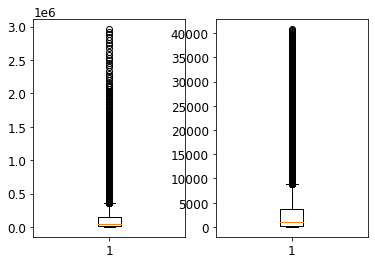

In [165]:
newFrame = pd.DataFrame(frame, columns = ['Confirmed', 'Deaths'])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot([newFrame['Confirmed']])
ax2.boxplot([newFrame['Deaths']])
plt.show()

array([[<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>]], dtype=object)

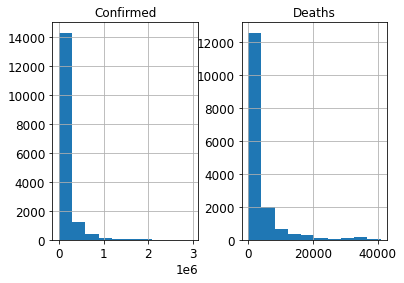

In [166]:
newFrame.hist()

Text(0.5, 0, 'Deaths')

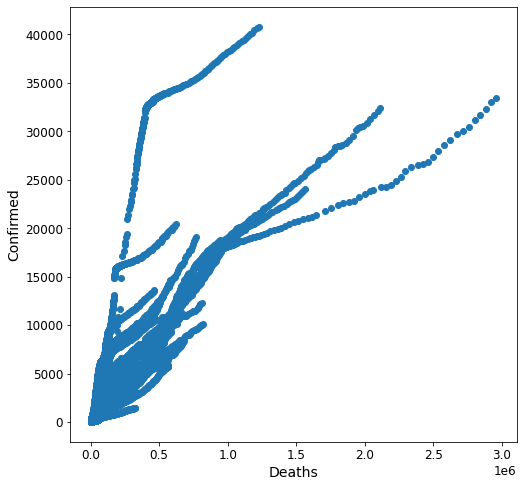

In [167]:
confirmedC = newFrame['Confirmed']
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])
a1.scatter(newFrame['Confirmed'], newFrame['Deaths'])
plt.ylabel('Confirmed')
plt.xlabel('Deaths')

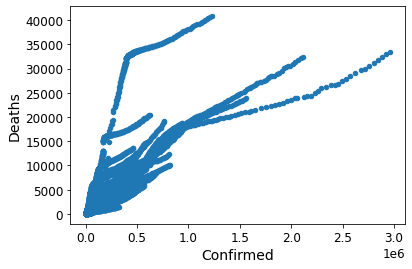

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

X = np.c_[newFrame['Confirmed']]
y = np.c_[newFrame['Deaths']]

newFrame.plot(kind='scatter', x="Confirmed", y='Deaths')
plt.show()


In [169]:
X.shape
y.shape

(16258, 1)

In [170]:
from sklearn.linear_model import LinearRegression

# Create a simple linear regression model
model = LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X,y)


LinearRegression()

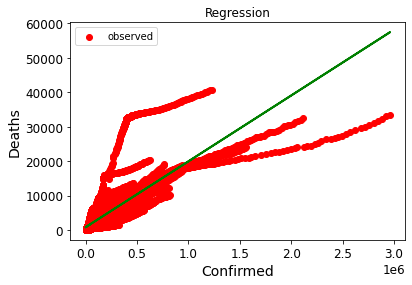

In [171]:
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Regression')

# plot the regression function
plt.plot(X,model.predict(X), c='green', label='fitted', linewidth=2)

plt.show()

In [172]:
X.shape

(16258, 1)

In [173]:
y.shape

(16258, 1)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=300)
logreg.fit(X_train, y_train)

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [175]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.02


### Part 2: Write a summary of what you find from the data

### Submit your summary to Canvas